## KNN classification with sklearn

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls biomechanical-features-of-orthopedic-patients/

column_2C_weka.csv column_3C_weka.csv


In [3]:
data=pd.read_csv("biomechanical-features-of-orthopedic-patients/column_2C_weka.csv",header=0,comment="#")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


Populating the interactive namespace from numpy and matplotlib


/Users/hbi16859/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b936ed0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11bc14d10>]], dtype=object)

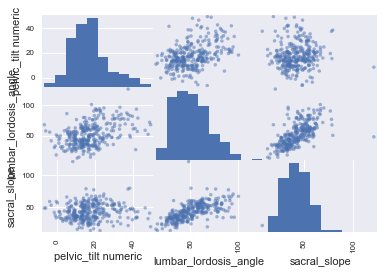

In [5]:
%pylab inline
pd.scatter_matrix(data.iloc[:,1:4])

## Use KNN to do classification

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
knn=KNeighborsClassifier(n_neighbors=3)
x,y=data.loc[:,data.columns!='class'],data.loc[:,'class']
knn.fit(x,y)
prediction=knn.predict(x)

In [8]:
print prediction

['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal' 'Normal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abn

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [11]:
x_train.shape

(248, 6)

In [12]:
y_train.shape

(248,)

In [18]:
knn2 = KNeighborsClassifier() #KNeighborsClassifier(n_neighbors = 3)
knn2.fit(x_train,y_train)
#prediction2 = knn2.predict(x_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
knn2.score(x_test,y_test) #accuracy

0.80645161290322576

In [39]:
neig=np.arange(1,60)
neig

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59])

## Performance

In [40]:
train_accuracy=[]
test_accuracy=[]

In [41]:
for i,k in enumerate(neig): 
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))

    

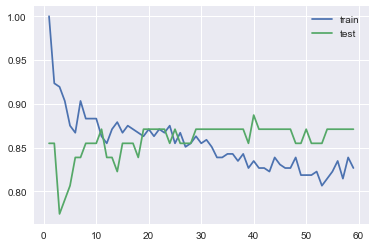

In [42]:
plt.plot(neig,train_accuracy,label="train")
plt.plot(neig,test_accuracy,label="test")
plt.legend()

In [38]:
len(data["pelvic_incidence"])

310

In [43]:
#cross validation (k-fold)
from sklearn.model_selection import cross_val_score

In [47]:
#help(cross_val_score)
cross_val_score(knn,x,y,cv=5) #5-fold cross-validation 

array([ 0.30645161,  0.72580645,  0.85483871,  0.9516129 ,  0.87096774])

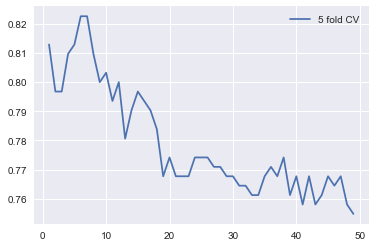

In [53]:
neig=np.arange(1,50)
cv_accuracy=[]
for i,k in enumerate(neig): 
    knn_cv=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn_cv,x,y,cv=5)
    cv_accuracy.append(np.mean(scores))
plt.plot(neig,cv_accuracy,label="5 fold CV")
plt.legend()

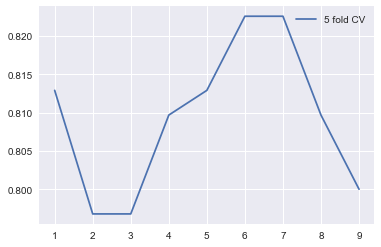

In [54]:
#it seems from above, the highest accuracy comes with a k value of around 7-8,
neig=np.arange(1,10)
cv_accuracy=[]
for i,k in enumerate(neig): 
    knn_cv=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn_cv,x,y,cv=5)
    cv_accuracy.append(np.mean(scores))
plt.plot(neig,cv_accuracy,label="5 fold CV")
plt.legend()
#from the figures below
#k=6 or 7 gives the best results

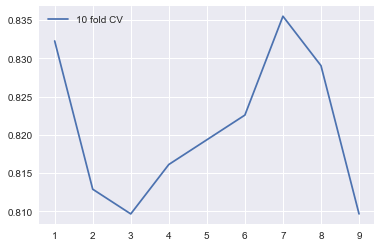

In [55]:
#it seems from above, the highest accuracy comes with a k value of around 7-8,
neig=np.arange(1,10)
cv_accuracy=[]
for i,k in enumerate(neig): 
    knn_cv=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn_cv,x,y,cv=10)
    cv_accuracy.append(np.mean(scores))
plt.plot(neig,cv_accuracy,label="10 fold CV")
plt.legend()
#from the figures below
#k=7 gives the best results

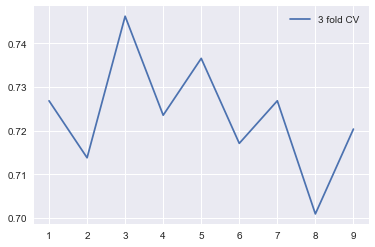

In [56]:
neig=np.arange(1,10)
cv_accuracy=[]
for i,k in enumerate(neig): 
    knn_cv=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn_cv,x,y,cv=3)
    cv_accuracy.append(np.mean(scores))
plt.plot(neig,cv_accuracy,label="3 fold CV")
plt.legend()

In [ ]:
#from the above figures, you can see that with different folds of cross-validation,
#the optimal k (numbers of nearest neighbors) is different
#
#I am not sure how to make sense of it